# <u>Group Project: Kickstarter Campaign</u>

Kickstarter is a company that provides the space for independent artists, creative, innovators, and entrepreneurs to bring their unique projects to life. Kickstarter allows anyone to financially support the project through an online pledging system - this means; anyone can pledge a specific amount of money towards the funding goal of the project. Kickstarter projects (also called campaigns) are all-or-nothing -- meaning, if the funding goal isn't met 100% (or exceeded), the project campaign fails and no funding is provided. The stakes are high - but what is it about certain campaigns that make them succeed while others fail? 

You have joined the marketing team for Kickstarter and you are tasked with exploring the features of several campaigns over the past few years. You are responsible for looking at this dataset and pulling out key insights about the characteristics of Kickstarter campaigns that make them more likely to succeed or fail. The marketing team at Kickstarter has a limited amount of funds to devote to highlighting specific projects, and they want to highlight projects that have the best chance of succeeding (i.e. meeting the funding goal). Can you help them determine who that might be?

Complete the steps below to take a dataset from inception to insights, for the purpose of answering the following two questions:

    1. What kinds of projects should the Kickstarter Marking Team focus their attention on?
    2. Why should the Marketing Team focus their attention in that direction?

After you have combed through the data, your group will put together a presentation (including visualizations), that clearly answers the two questions above. The Kickstarter dataset is posted to Canvas. Complete the code in the notebook below to complete the project. <b> You are NOT restricted to the steps laid out in this notebook to complete your project, You can conduct additional analyses or create additional visualizations. This notebook is everything you need to cover, but feel free to expand on these steps! This includes completing regression analyses with the dataset.</b>

## <font color=red>Part 1: Domain Knowledge</font>

Before you begin looking at the data, you need to expand your knowledge of the subject matter. Start by visiting www.kickstarter.com and read all you can about the company. What is the objective of the company? How does it work? What does the project timeline look like? You should research the company until you feel comfortable speaking about the basics of Kickstarter projects. Use the space below (double-click the cell to activate) to write a brief paragraph about what you learned about Kickstarter. 

### <font color=red>Questions to Answer</font>
1. What is Kickstarter?
2. What is the purpose of Kickstarter?
3. Who are the "backers" of a Kickstarter campaign?
4. How is success determined for a project campaign?

****

### <font color=red>KICKSTARTER INFORMATION</font>

#### Start your paragraph here . . . Be sure to answer all questions in this space!

In [ ]:
Kickstarter is a funding program that helps anyone in public who wants funds to start their oown money. 

## <font color=darkorange>Part 2: Data Import and Cleaning</font>

Now that you are familiar with where the data is coming from, you are ready to start examining the data. The Kickstarter Dataset is a collection of project campaign information from 2016. Data includes information about the project name, length, country of origin, goal, and the amount of money raised, etc. If you open the Kickstarter Dataset in excel, the second tab provides descriptions of each of the columns/variables. Import the dataset into this notebook and follow the steps below to gather information about the data and to clean up the dataset. Use the space below (double-click the cell to activate) to write a brief paragraph describing the dataset and the steps you took while cleaning the data. 

### <font color=darkorange>Questions to Answer</font>
1. How many columns are in the dataset? How many rows?
2. What type of variables (continuous, categorical) make up this dataset?
3. Which variables have missing values? 
4. How did you handle the missing data in the dataset?
5. How many rows are in your dataset after handling missing data?
6. Are there any odd or inappropriate values within a column that don't make sense? If so, what are they?
7. What percentage of the each project was funded? In other words, how close were they to reaching the goal? You will need to create a new variable to answer this question.

***

### <font color=darkorange>DATASET INFORMATION AND CLEANING</font>

#### Start your paragraph here . . . Be sure to answer all questions in this space!

In [4]:
## import libraries and import Kickstarter dataset
import pandas as pd
import numpy as np

import statsmodels.formula.api as sm

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
import scipy.stats as stats

## this is a large dataset, we want to see all rows 
#pd.set_option('display.max_rows', None)


## this is a very large dataset, be patient, it may take a while to import!!

df = pd.read_excel("Kickstarter_Dataset.xlsx")

df.head()

,ID,name,main_category,category,country,currency,launched,deadline,length_days,goal,pledged,usd pledged,backers,state
0,1009317190,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,3984.0,3984.000000,46,failed
1,1618024139,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,7386.0,1561.784015,31,failed
2,2004838949,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,3834.0,4152.402045,46,failed
3,258770123,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,18.0,19.435528,6,failed
4,690137136,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,2598.0,2908.076574,29,failed


In [12]:
## determine dataset shape (number of rows and columns)

df.shape()

TypeError: 'tuple' object is not callable

In [13]:
## determine dataset features (info) and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281856 entries, 0 to 281855
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             281856 non-null  int64         
 1   name           281856 non-null  object        
 2   main_category  281856 non-null  object        
 3   category       281856 non-null  object        
 4   country        281856 non-null  object        
 5   currency       281856 non-null  object        
 6   launched       281856 non-null  datetime64[ns]
 7   deadline       281856 non-null  datetime64[ns]
 8   length_days    281856 non-null  int64         
 9   goal           281856 non-null  float64       
 10  pledged        281856 non-null  float64       
 11  usd pledged    281856 non-null  object        
 12  backers        281856 non-null  int64         
 13  state          281856 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(7

usd pledged
0.000000e+00    1.793363e+02
5.663140e-01    5.000000e+00
5.716353e-01    5.000000e+00
5.736185e-01    5.000000e+00
5.766689e-01    5.000000e+00
5.781542e-01    5.000000e+00
5.793578e-01    5.000000e+00
5.795668e-01    2.600000e+01
5.805183e-01    5.000000e+00
5.809512e-01    5.000000e+00
5.811209e-01    5.000000e+00
5.819676e-01    5.000000e+00
5.830650e-01    5.000000e+00
5.836673e-01    5.000000e+00
5.837681e-01    5.000000e+00
5.845155e-01    5.000000e+00
5.849307e-01    5.000000e+00
5.852939e-01    5.000000e+00
5.857714e-01    5.000000e+00
5.862888e-01    5.000000e+00
5.866432e-01    5.000000e+00
5.875965e-01    5.000000e+00
5.878973e-01    5.000000e+00
5.882422e-01    5.000000e+00
5.882834e-01    5.000000e+00
5.885197e-01    5.000000e+00
5.893091e-01    5.000000e+00
5.905218e-01    5.000000e+00
5.907520e-01    5.000000e+00
5.914382e-01    5.000000e+00
5.949274e-01    5.000000e+00
5.951678e-01    5.000000e+00
5.952907e-01    5.000000e+00
5.966482e-01    5.000000e+00
5.

<AxesSubplot:xlabel='pledged', ylabel='usd pledged'>

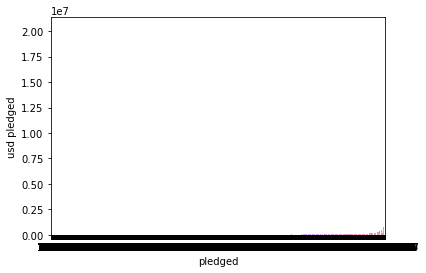

In [7]:
## determine which variables have missing data 
print(df["pledged"].groupby(df["usd pledged"]).mean())

sns.barplot(data = df, x = "pledged", y = "usd pledged", ci = None)


In [14]:
## handling missing data

## fill all the missing values in "name" with "Unknown Project Name"

df.replace(np.nan, "Unkown Project Name", inplace = True)

## drop all the rows where "usd pledged" is missing
df.drop("ID", "Name", "Main_Category", "Category", "Country", "Currency", "Launched", "Deadline", "Length_days", "Goal"
       , "Pledged", "Usd Pledged", "Backers", "State").


SyntaxError: invalid syntax (Temp/ipykernel_2068/1492988994.py, line 9)

In [9]:
## inappropriate values in categorical variables; check value counts
df["Pledge"].value_counts()


KeyError: 'Pledge'

In [ ]:
## drop unneeded columns (project ID, name, pledged, launched, deadline)
# you will use usd pledged from now on
df.drop(columns )


In [ ]:
# create a new column
## percentage of project that was funded - how close were they to reaching the goal?

df["pct_funded"] = (df["usd pledged"]/df["goal"])*100

## <font color=#EAC117>Part 3: Exploratory Analysis</font>

With a clean dataset, you are now ready to start exploring the variables in your dataset. Don't worry about how your variables relate to each other - we will cover that in the next section. For now, it's more important that you get a clear sense of the variable characteristics on their own. Follow the steps below to explore all of the variables within your dataset and preform descriptive statistics. In addition to the descriptive statistics, you are tasked with creating a visualizations related to your results. Stylistic choices related to the visualizations is up to your group. Use the space below (double-click the cell to activate) to write a brief paragraph describing the steps you took to explore the data. 

### <font color=#EAC117>Questions to Answer</font>
1.	What is the average (mean) for the following variables: goal, usd pledged, backers, and length? 
2.	What is the maximum value, minimum value, and range for the following variables: goal, usd pledged, backers, and length?
3.	What is the most common (mode) length for campaign projects?
4.	Considering the categorical variables, what is the most frequent main category group? How many projects are classified under this category? What is the most frequent sub-category? How many projects are classified under this category? 
5.	Considering the categorical variables, what is the least frequent main category group? How many projects are classified under this category? What is the least frequent sub-category? How many projects are classified under this category? 
6.	Which country has started the most Kickstarter campaigns?
7.	How many projects have failed? How many projects have succeeded?

### <font color=#EAC117>Visualizations to Create</font> 
* Number of Projects by Main Category
* Number of projects by State (outcome)
* Number of projects from each country
* Number of successful projects and failed projects by Main Category

***

### <font color=#EAC117>EXPLORATORY DATA ANALYSIS</font>

#### Start your paragraph here . . . Be sure to answer all questions in this space!

In [ ]:
## output descriptive statistics for numeric variables in the dataset
sns.histplot(df['category'], color = "red", label = "pledge", kde=True)
sns.histplot(df[''], color ="blue", label = "", kde=True)


In [ ]:
## calculate the range for all numeric variables



In [ ]:
## frequency of categorical variable groups



## <font color=#6AA121>Part 4: Variable Relationships</font>

It's time to explore the relationships between variables and answer some of the critical questions for the project. Your dependent/outcome variable is <b>STATE</b> - this is the variable that captures if the project was successful or not. In addition to exploring the relationships between your other independent variables, you want to pay close attention to the relationship between your independent variables and state. Follow the steps below to explore the relationships between your variables. In addition, you are tasked with creating visualizations related to your results. Stylistic choices related to the visualizations is up to your group. Use the space below (double-click the cell to activate) to write a brief paragraph describing the steps you took to determine variable relationships. 

### <font color=#6AA121>Questions to Answer</font>
1.	How correlated are the numeric variables within this dataset? Create a correlation matrix to find out. Is anything highly correlated?
2.	What is the average amount of money pledged across each of the main categories? What about across the following: sub-category, country, currency, and state? Which main category is the most profitable? 
3.	What is the average number of backers across each of the main categories? What about across the following: sub-category, country, currency, and state? Which main category is the most popular?
4.	What percentage of projects succeed and fail across each of the main categories?
5.	Which of the main categories have the highest success rate (top 3)? Which of the sub-categories have the highest success rate (top 3)?
6.	What is the average duration of a campaign for projects that succeed? What is the average duration for projects that fail?
7.  What is the average funding goal of a campaign for projects that succeed? What is the average funding goal for projects that fail?


### <font color=#6AA121>Visualizations to Create</font> 
* Average Pledge by Main Category
* Average Num Backers by Main Category
* Average Pledge by State
* Average Num Backers by State
* Average Funding Goal by Main Category
* Average Funding Goal by State
* Average Percentage of Funding Collected by Main Category

***

### <font color=#6AA121>RELATIONSHIPS BETWEEN VARIABLES</font>

#### Start your paragraph here . . . Be sure to answer all questions in this space!

In [ ]:
## create a correlation matrix for the continuous variables



In [ ]:
## average pledge across categoricial variables (groupby)


In [ ]:
## average number of backers across categorical variables (groupby)


In [ ]:
## averages of all numeric variables grouped by state (groupby)


In [ ]:
# average number of backers and pledges by main category 
# include the variable "pct_funded" to get a better picture of the projects that met/exceeded their goal


In [ ]:
# average number of backers and pledges by main category and subcategory 


In [ ]:
## state by campaign main category (crosstab)
# hint: list 'state' second for an easier to read table


# HINT: it's easier to understand the differences between groups by looking at percentages

In [ ]:
## state by campaign sub-category (crosstab)
# hint: list 'state' second for an easier to read table



# HINT: it's easier to understand the differences between groups by looking at percentages

## <font color=#306EFF>Part 5: Group Presentation</font>

By now, your group should feel very comfortable with the aspects of the Kickstarter dataset. You should have a firm understanding of what Kickstarter is, what the dataset contains, the characteristics of each variable, how the variables interact with each other, and finally, which variables influence the outcome of the Kickstarter campaign. Can you put all this information together to tell a story about the data? Your presentation should include visualizations and clear answers to the two primary questions:

    1. What kinds of projects should the Kickstarter Marking Team focus their attention on?
    2. Why should the Marketing Team focus their attention in that direction?

In addition to these two questions, your presentation should cover the additional questions listed below. These questions should be easy to answer using the information you discovered above. When you are done, submit your completed notebook to me.   

### <font color=#306EFF>Questions to Answer</font>
1.	What main category is the most profitable (highest amount of money pledged)? 
2.	Which main category is the most popular (highest number of backers)?
3.	Which sub-categories are the most profitable and popular (top 3)?
4.	What are some of the characteristics of a successful Kickstarter campaign? 
5.	How does the success or failure of Kickstarter campaigns differ between main category, sub-category, country, and length of campaign? Please mention only the most notable – you do not need to detail the success/failure rate for each category/sub-category? 

***

### <font color=#306EFF>TIPS FOR A GREAT PRESENTATION</font>

* Start with the most important information (answers to the two questions above), and work backwards. The entire class will be working with the same dataset, therefore, we don't need to know the details of all your coding -- we just want to know what findings are most important to the questions. 
* Create clear visualizations. Make sure your audience can quickly and easily understand what your visualizations are showing. While you have a lot of options for how to style your visualizations, don't go overboard! 
* Make sure everyone understands what the visualization is showing; it should not have to stand on its own. When you present a visualization, you should be able to discuss what it means and what the significance is. 
* Use a single presentation format -- you can create a PowerPoint presentation or organize your notebook in a way that is easy to follow; reguardless of what your group puts together, you should use only ONE format. 